  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.

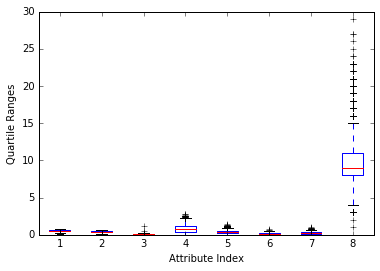

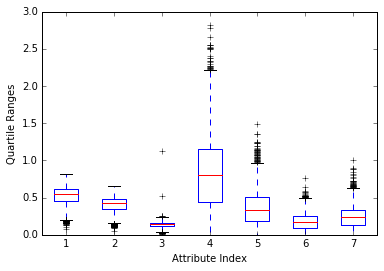

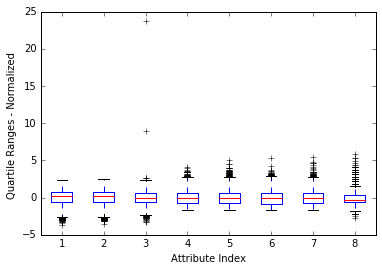

In [1]:
import pandas as pd
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plot
%matplotlib inline

target_url = ("http://archive.ics.uci.edu/ml/machine-"
              "learning-databases/abalone/abalone.data")
#read abalone data
abalone = pd.read_csv(target_url,header=None, prefix="V")
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
                   'Shucked weight', 'Viscera weight', 'Shell weight',
                   'Rings']


print(abalone.head())
print(abalone.tail())

#print summary of data frame
summary = abalone.describe()
print(summary)

#box plot the real-valued attributes
#convert to array for plot routine
array = abalone.iloc[:,1:9].values
boxplot(array)
plot.xlabel("Attribute Index")
plot.ylabel(("Quartile Ranges"))
show()

#the last column (rings) is out of scale with the rest
# - remove and replot
array2 = abalone.iloc[:,1:8].values
boxplot(array2)
plot.xlabel("Attribute Index")
plot.ylabel(("Quartile Ranges"))
show()

#removing is okay but renormalizing the variables generalizes better.
#renormalize columns to zero mean and unit standard deviation
#this is a common normalization and desirable for other operations
# (like k-means clustering or k-nearest neighbors
abaloneNormalized = abalone.iloc[:,1:9]


for i in range(8):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    abaloneNormalized.iloc[:,i:(i + 1)] = (
                    abaloneNormalized.iloc[:,i:(i + 1)] - mean) / sd

array3 = abaloneNormalized.values
boxplot(array3)
plot.xlabel("Attribute Index")
plot.ylabel(("Quartile Ranges - Normalized "))
show()


# Parallel Coordinates for Regression Problems

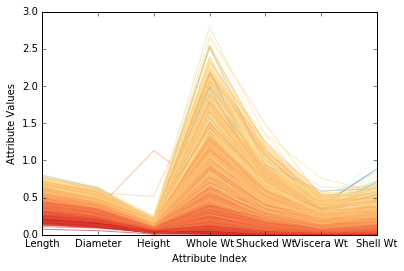

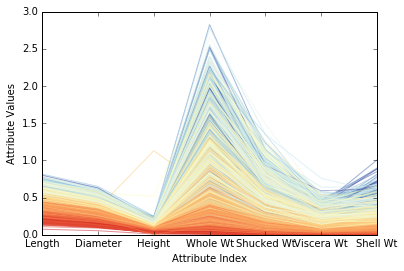

In [2]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
from math import exp
%matplotlib inline
target_url = ("http://archive.ics.uci.edu/ml/machine-"
              "learning-databases/abalone/abalone.data")
#read abalone data
abalone = pd.read_csv(target_url,header=None, prefix="V")
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height',
                   'Whole Wt', 'Shucked Wt',
                   'Viscera Wt', 'Shell Wt', 'Rings']
#get summary to use for scaling
summary = abalone.describe()
minRings = summary.iloc[3,7]
maxRings = summary.iloc[7,7]
nrows = len(abalone.index)

for i in range(nrows):
    #plot rows of data as if they were series data
    dataRow = abalone.iloc[i,1:8]
    labelColor = (abalone.iloc[i,8] - minRings) / (maxRings - minRings)
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)

plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()

#renormalize using mean and standard variation, then compress
# with logit function

meanRings = summary.iloc[1,7]
sdRings = summary.iloc[2,7]

for i in range(nrows):
    #plot rows of data as if they were series data
    dataRow = abalone.iloc[i,1:8]
    normTarget = (abalone.iloc[i,8] - meanRings)/sdRings
    labelColor = 1.0/(1.0 + exp(-normTarget))
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)

plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()


# How to Use Correlation Heat Map for Regression—Visualize
Pair‐Wise Correlations for the Abalone Problem

                  Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
Shucked weig

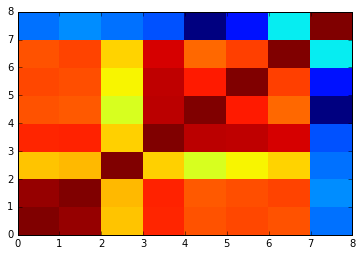

In [4]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
%matplotlib inline

target_url = ("http://archive.ics.uci.edu/ml/machine-"
              "learning-databases/abalone/abalone.data")
#read abalone data
abalone = pd.read_csv(target_url,header=None, prefix="V")
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height',
                   'Whole weight', 'Shucked weight',
                   'Viscera weight', 'Shell weight', 'Rings']

#calculate correlation matrix
corMat = DataFrame(abalone.iloc[:,1:9].corr())
#print correlation matrix
print(corMat)

#visualize correlations using heatmap
plot.pcolor(corMat)
plot.show()

# Coding Categorical Variable for Penalized Regression

['Shell weight', 'Height', 'Sex2', 'Shucked weight', 'Diameter', 'Sex1']


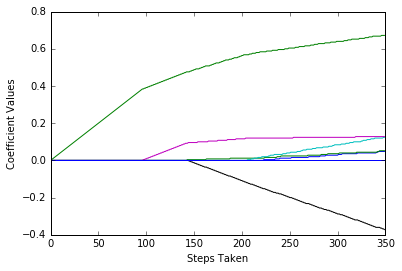

In [2]:
import numpy
from sklearn import datasets, linear_model
from math import sqrt
import matplotlib.pyplot as plot
%matplotlib inline
import urllib
from urllib.request import urlopen
import sys
#read data from uci data repository
target_url = urllib.request.Request("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
data = urlopen(target_url)

xList = []
labels = []

for line in data:
    #split on semi-colon
    row = line.strip().decode().split(",")

    #put labels in separate array and remove label from row
    labels.append(float(row.pop()))

    #form list of list of attributes (all strings)
    xList.append(row)

names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

#code three-valued sex attribute as numeric
xCoded = []
for row in xList:
    #first code the three-valued sex variable
    codedSex = [0.0, 0.0]
    if row[0] == 'M': codedSex[0] = 1.0
    if row[0] == 'F': codedSex[1] = 1.0

    numRow = [float(row[i]) for i in range(1,len(row))]
    rowCoded = list(codedSex) + numRow
    xCoded.append(rowCoded)

namesCoded = ['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

nrows = len(xCoded)
ncols = len(xCoded[1])

xMeans = []
xSD = []
for i in range(ncols):
    col = [xCoded[j][i] for j in range(nrows)]
    mean = sum(col)/nrows
    xMeans.append(mean)
    colDiff = [(xCoded[j][i] - mean) for j in range(nrows)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrows)])
    stdDev = sqrt(sumSq/nrows)
    xSD.append(stdDev)

#use calculate mean and standard deviation to normalize xCoded
xNormalized = []
for i in range(nrows):
    rowNormalized = [(xCoded[i][j] - xMeans[j])/xSD[j] for j in range(ncols)]
    xNormalized.append(rowNormalized)

#Normalize labels
meanLabel = sum(labels)/nrows
sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] - meanLabel) for i in range(nrows)])/nrows)

labelNormalized = [(labels[i] - meanLabel)/sdLabel for i in range(nrows)]

#initialize a vector of coefficients beta
beta = [0.0] * ncols

#initialize matrix of betas at each step
betaMat = []
betaMat.append(list(beta))


#number of steps to take
nSteps = 350
stepSize = 0.004
nzList = []

for i in range(nSteps):
    #calculate residuals
    residuals = [0.0] * nrows
    for j in range(nrows):
        labelsHat = sum([xNormalized[j][k] * beta[k] for k in range(ncols)])
        residuals[j] = labelNormalized[j] - labelsHat

    #calculate correlation between attribute columns from normalized wine and residual
    corr = [0.0] * ncols

    for j in range(ncols):
        corr[j] = sum([xNormalized[k][j] * residuals[k] for k in range(nrows)]) / nrows

    iStar = 0
    corrStar = corr[0]

    for j in range(1, (ncols)):
        if abs(corrStar) < abs(corr[j]):
            iStar = j; corrStar = corr[j]

    beta[iStar] += stepSize * corrStar / abs(corrStar)
    betaMat.append(list(beta))


    nzBeta = [index for index in range(ncols) if beta[index] != 0.0]
    for q in nzBeta:
        if (q in nzList) == False:
            nzList.append(q)

nameList = [namesCoded[nzList[i]] for i in range(len(nzList))]

print(nameList)
for i in range(ncols):
    #plot range of beta values for each attribute
    coefCurve = [betaMat[k][i] for k in range(nSteps)]
    xaxis = range(nSteps)
    plot.plot(xaxis, coefCurve)

plot.xlabel("Steps Taken")
plot.ylabel(("Coefficient Values"))
plot.show()




# Random Forest

MSE
4.30081494486


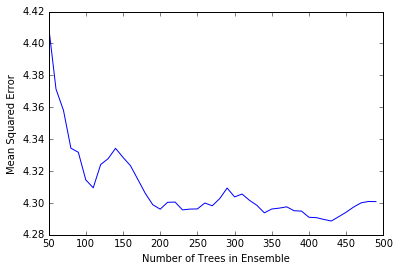

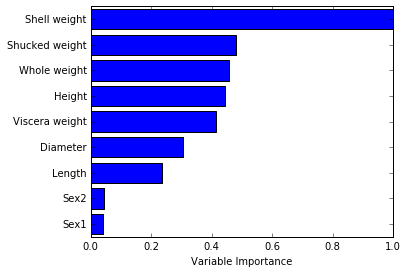

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import numpy

import matplotlib.pyplot as plot
%matplotlib inline
import urllib
from urllib.request import urlopen
import sys
#read data from uci data repository
target_url = urllib.request.Request("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
data = urlopen(target_url)

xList = []
labels = []

for line in data:
    #split on semi-colon
    row = line.strip().decode().split(",")

    #put labels in separate array and remove label from row
    labels.append(float(row.pop()))

    #form list of list of attributes (all strings)
    xList.append(row)

#code three-valued sex attribute as numeric
xCoded = []
for row in xList:
    #first code the three-valued sex variable
    codedSex = [0.0, 0.0]
    if row[0] == 'M': codedSex[0] = 1.0
    if row[0] == 'F': codedSex[1] = 1.0

    numRow = [float(row[i]) for i in range(1,len(row))]
    rowCoded = list(codedSex) + numRow
    xCoded.append(rowCoded)

#list of names for
abaloneNames = numpy.array(['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
                            'Viscera weight', 'Shell weight', 'Rings'])

#number of rows and columns in x matrix
nrows = len(xCoded)
ncols = len(xCoded[1])

#form x and y into numpy arrays and make up column names
X = numpy.array(xCoded)
y = numpy.array(labels)

#break into training and test sets.
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=531)

#train random forest at a range of ensemble sizes in order to see how the mse changes
mseOos = []
nTreeList = range(50, 500, 10)
for iTrees in nTreeList:
    depth = None
    maxFeat  = 4 #try tweaking
    abaloneRFModel = ensemble.RandomForestRegressor(n_estimators=iTrees, max_depth=depth, max_features=maxFeat,
                                                 oob_score=False, random_state=531)

    abaloneRFModel.fit(xTrain,yTrain)

    #Accumulate mse on test set
    prediction = abaloneRFModel.predict(xTest)
    mseOos.append(mean_squared_error(yTest, prediction))


print("MSE" )
print(mseOos[-1])


#plot training and test errors vs number of trees in ensemble
plot.plot(nTreeList, mseOos)
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
#plot.ylim([0.0, 1.1*max(mseOob)])
plot.show()

# Plot feature importance
featureImportance = abaloneRFModel.feature_importances_

# normalize by max importance
featureImportance = featureImportance / featureImportance.max()
sortedIdx = numpy.argsort(featureImportance)
barPos = numpy.arange(sortedIdx.shape[0]) + .5
plot.barh(barPos, featureImportance[sortedIdx], align='center')
plot.yticks(barPos, abaloneNames[sortedIdx])
plot.xlabel('Variable Importance')
plot.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
plot.show()

# Printed Output:
# MSE
# 4.30971555911


# Predicting Abalone Age with Gradient Boosting

C:\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function staged_decision_function is deprecated;  and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


MSE
4.24892200734
1774


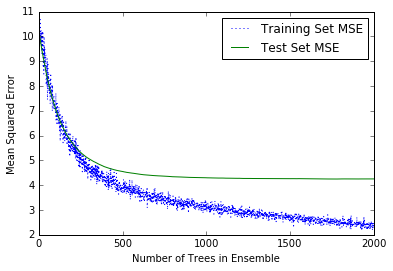

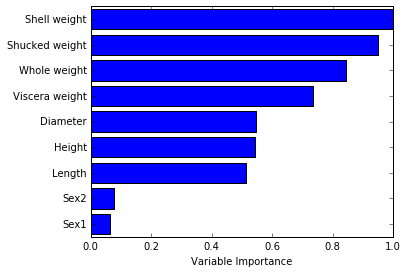

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

#code three-valued sex attribute as numeric
xCoded = []
for row in xList:
    #first code the three-valued sex variable
    codedSex = [0.0, 0.0]
    if row[0] == 'M': codedSex[0] = 1.0
    if row[0] == 'F': codedSex[1] = 1.0

    numRow = [float(row[i]) for i in range(1,len(row))]
    rowCoded = list(codedSex) + numRow
    xCoded.append(rowCoded)

#list of names for
abaloneNames = numpy.array(['Sex1', 'Sex2', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
                            'Viscera weight', 'Shell weight', 'Rings'])

#number of rows and columns in x matrix
nrows = len(xCoded)
ncols = len(xCoded[1])

#form x and y into numpy arrays and make up column names
X = numpy.array(xCoded)
y = numpy.array(labels)

#break into training and test sets.
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=531)

#instantiate model
nEst = 2000
depth = 5
learnRate = 0.005
maxFeatures = 3
subsamp = 0.5
abaloneGBMModel = ensemble.GradientBoostingRegressor(n_estimators=nEst, max_depth=depth, 
                                                     learning_rate=learnRate, max_features=maxFeatures,
                                                     subsample=subsamp, loss='ls')

#train
abaloneGBMModel.fit(xTrain, yTrain)

# compute mse on test set
msError = []
predictions = abaloneGBMModel.staged_decision_function(xTest)
for p in predictions:
    msError.append(mean_squared_error(yTest, p))

print("MSE" )
print(min(msError))
print(msError.index(min(msError)))

#plot training and test errors vs number of trees in ensemble
plot.figure()
plot.plot(range(1, nEst + 1), abaloneGBMModel.train_score_, label='Training Set MSE', linestyle=":")
plot.plot(range(1, nEst + 1), msError, label='Test Set MSE')
plot.legend(loc='upper right')
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
plot.show()

# Plot feature importance
featureImportance = abaloneGBMModel.feature_importances_

# normalize by max importance
featureImportance = featureImportance / featureImportance.max()
idxSorted = numpy.argsort(featureImportance)
barPos = numpy.arange(idxSorted.shape[0]) + .5
plot.barh(barPos, featureImportance[idxSorted], align='center')
plot.yticks(barPos, abaloneNames[idxSorted])
plot.xlabel('Variable Importance')
plot.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
plot.show()

# Printed Output:

# for Gradient Boosting
# nEst = 2000
# depth = 5
# learnRate = 0.003
# maxFeatures = None
# subsamp = 0.5
#
# MSE
# 4.22969363284
# 1736

#for Gradient Boosting with RF base learners
# nEst = 2000
# depth = 5
# learnRate = 0.005
# maxFeatures = 3
# subsamp = 0.5
#
# MSE
# 4.27564515749
# 1687
